In [1]:
import rgrow as rg
from typing import List, Tuple, Optional
import numpy as np

debug = False

In [3]:
class SDCStrand:
    def __init__(self, concentration, left_glue = None, btm_glue = None, right_glue = None, name = None, color = None,):
        self.concentration = concentration
        self.name = name
        self.color = color
        self.left_glue = left_glue
        self.btm_glue = btm_glue
        self.right_glue = right_glue

class SDCParams:
    def __init__(self, kf, kn, kc, temperature, glue_dg_s, scaffold, strands):
        self.k_f = kf
        self.k_n = kn
        self.k_c = kc
        self.glue_dg_s = glue_dg_s
        self.temperature = temperature
        self.scaffold = scaffold
        self.strands = strands

In [67]:
params = SDCParams(
    1e6, 1e5, 1e4, 37.0,
    { 
        "0": (-10.0, 0.0),
        "1": (-10.0, 0.0), 
        "2": (-10.0, 0.0), 
        # this will get converted to (-27.299999999999994, -0.4858999999999999)
        "btm": "GAGGGGGATTCAATGAATATTTAT",
    },
    [None, None, "btm", "btm", "btm", "btm", "btm", None, None],
    [
        SDCStrand(500e-3, "0", "btm*", "0*" , "0", "blue"),
        SDCStrand(500e-3, "1" , "btm*", "1*" , "1", "red"),
        SDCStrand(500e-3, "2" , "btm*", "2*" , "2", "yellow"),
    ]
)

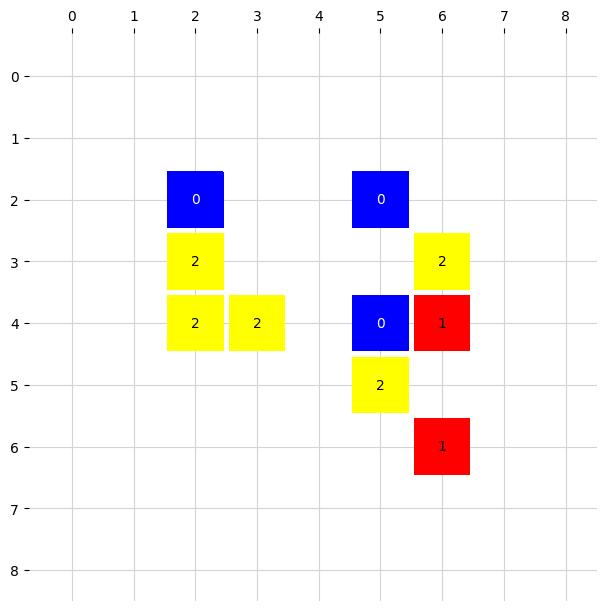

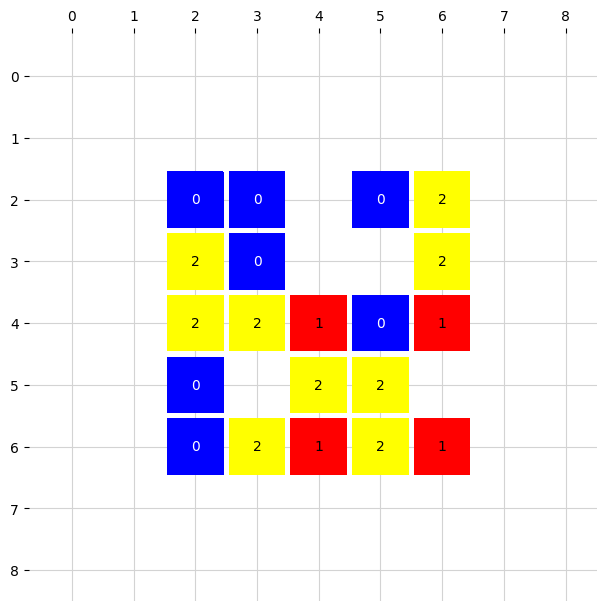

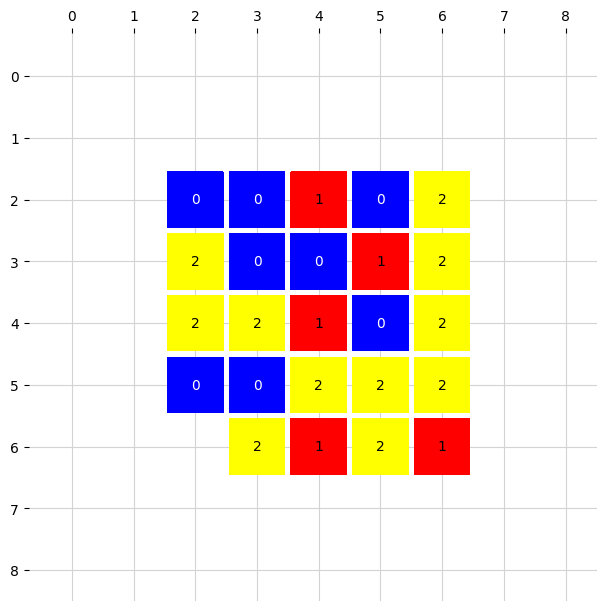

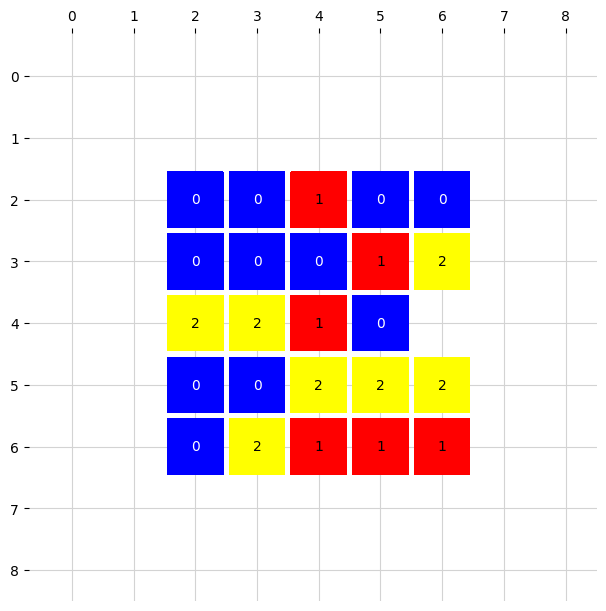

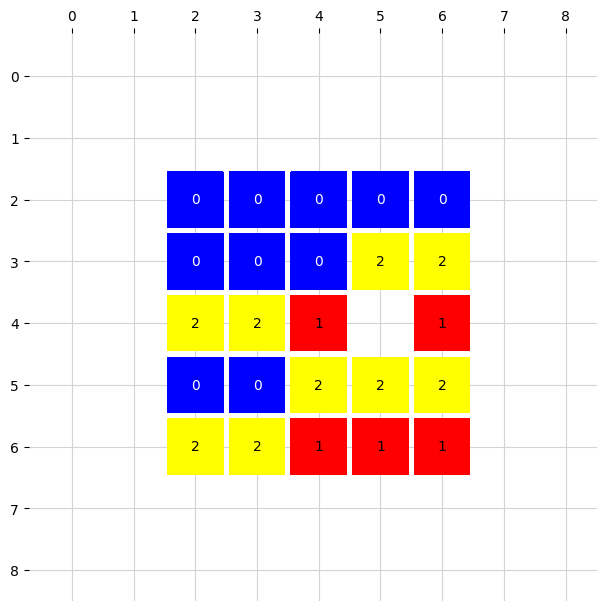

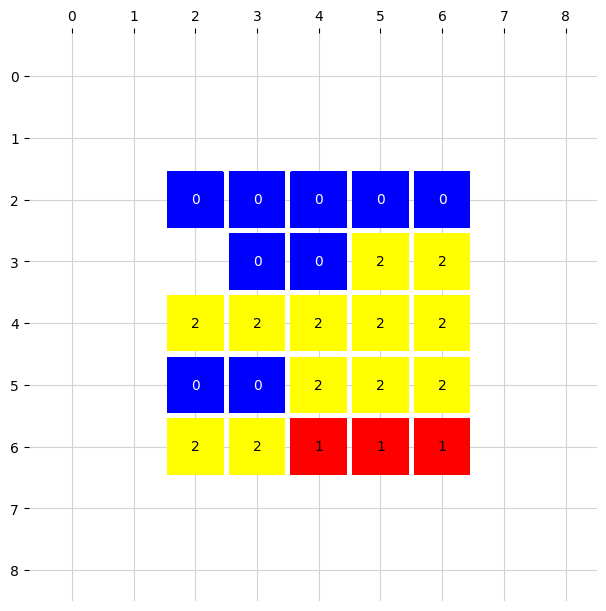

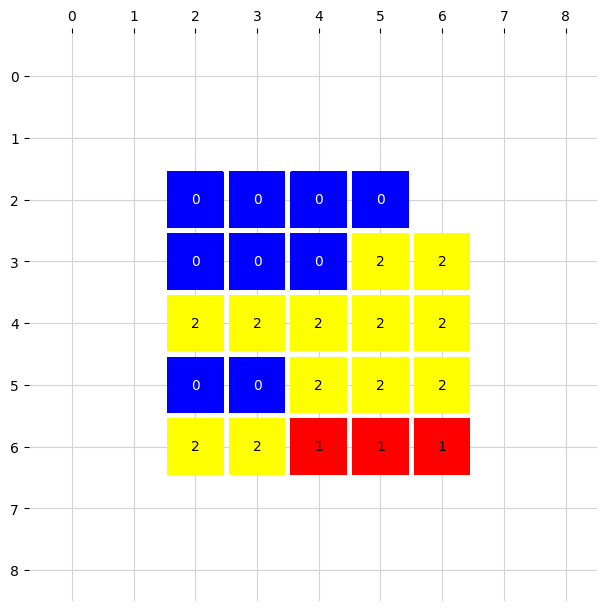

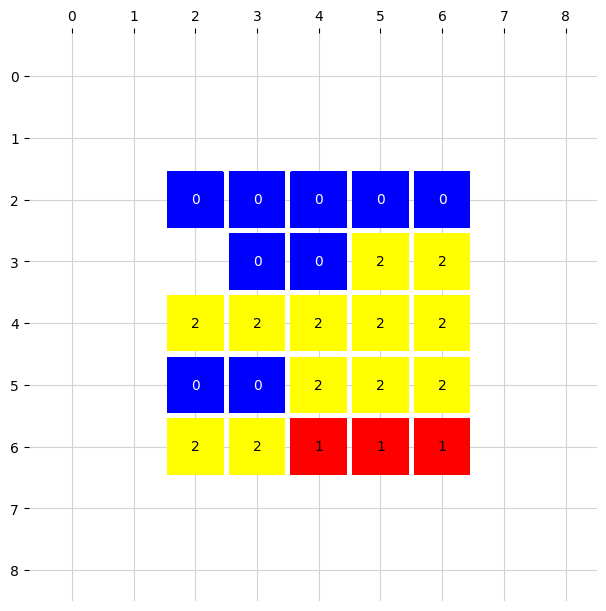

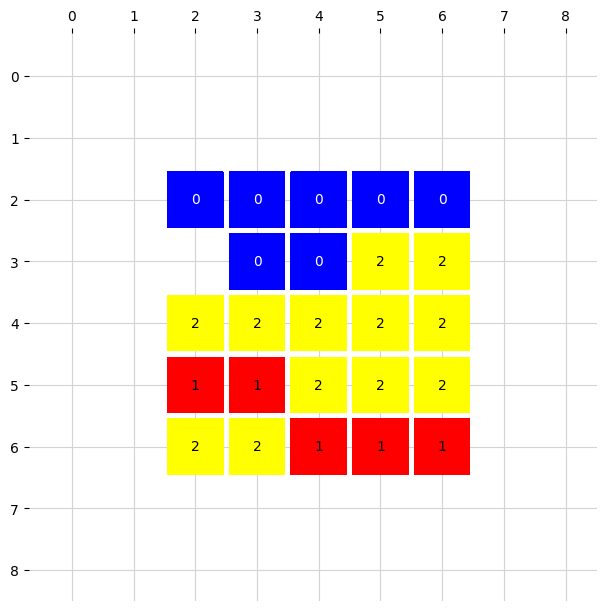

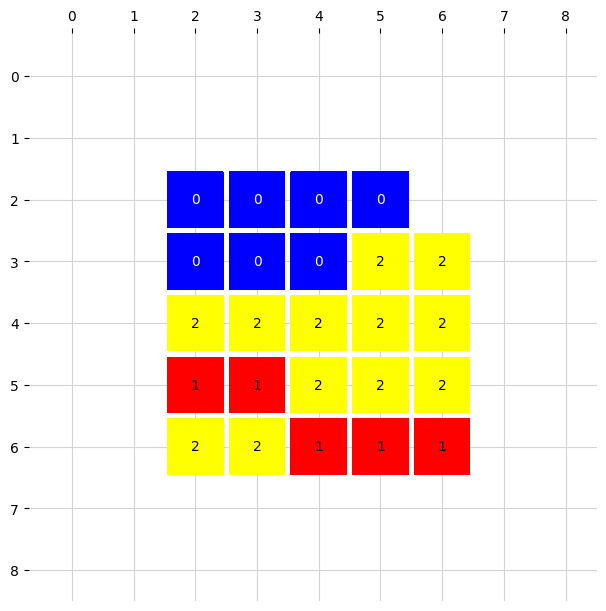

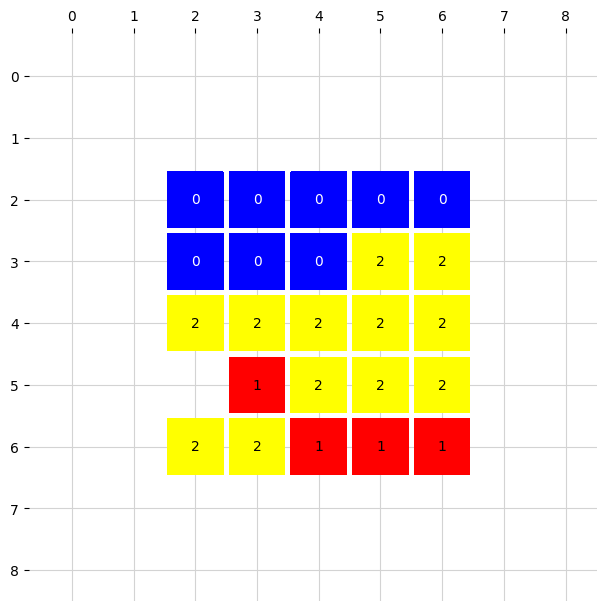

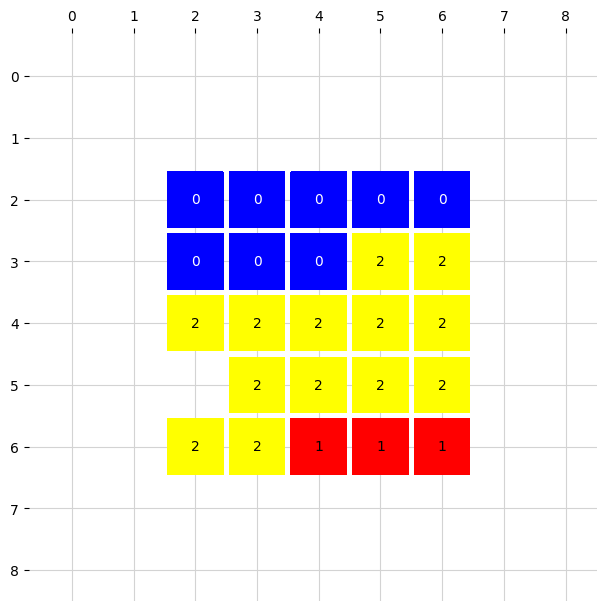

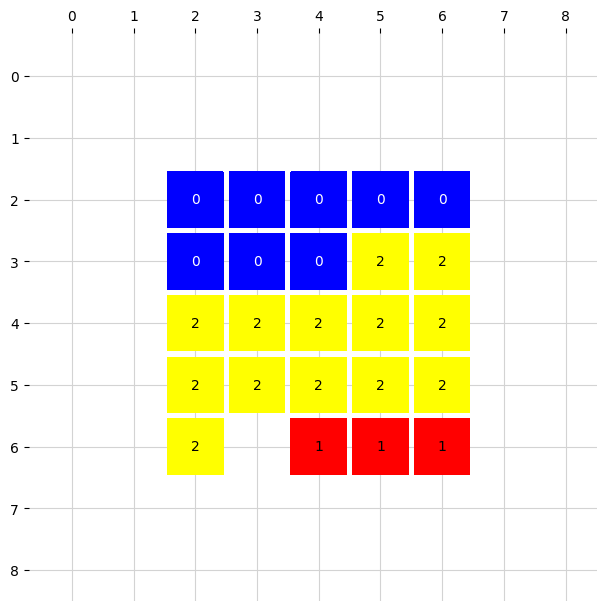

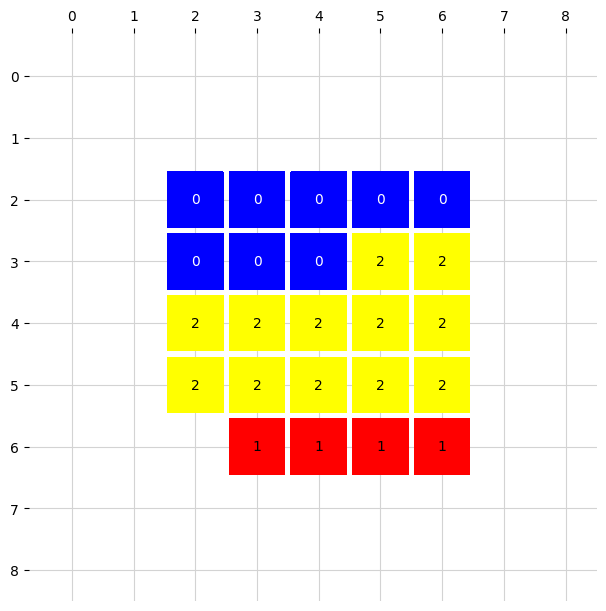

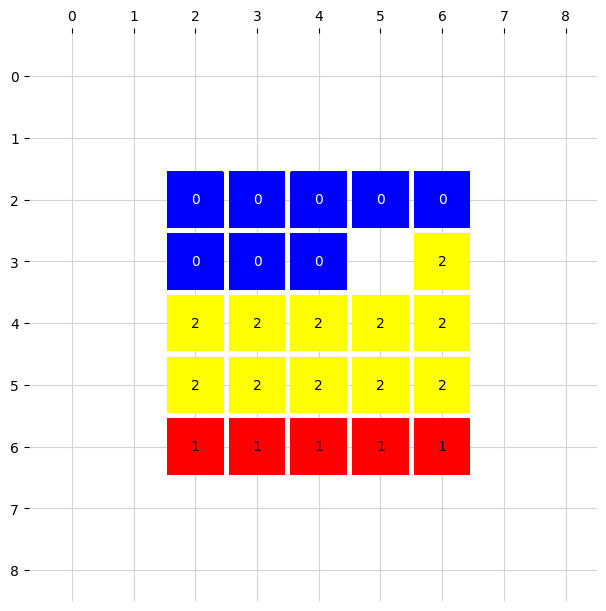

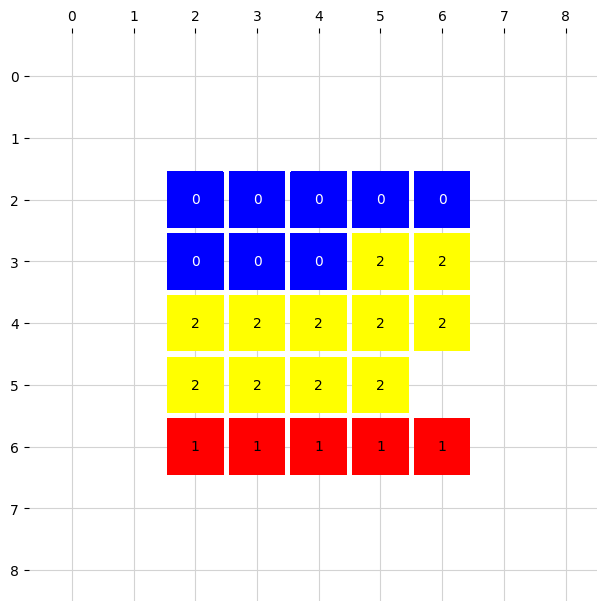

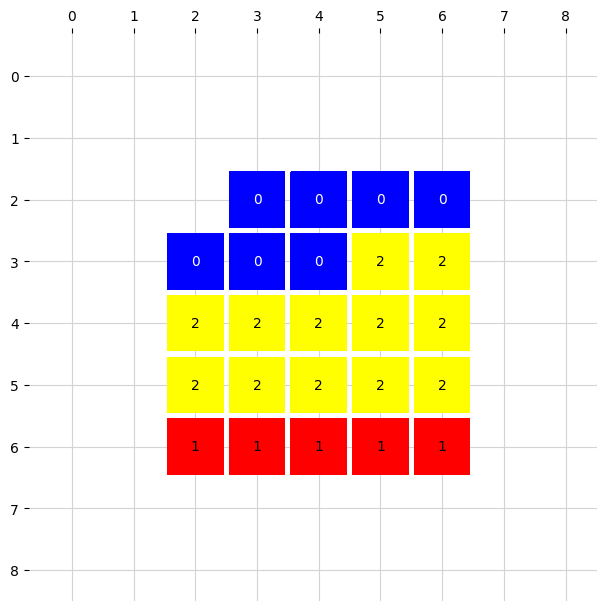

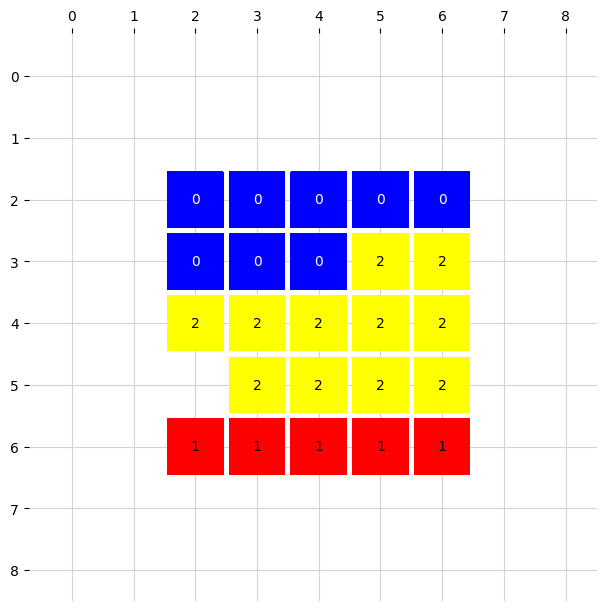

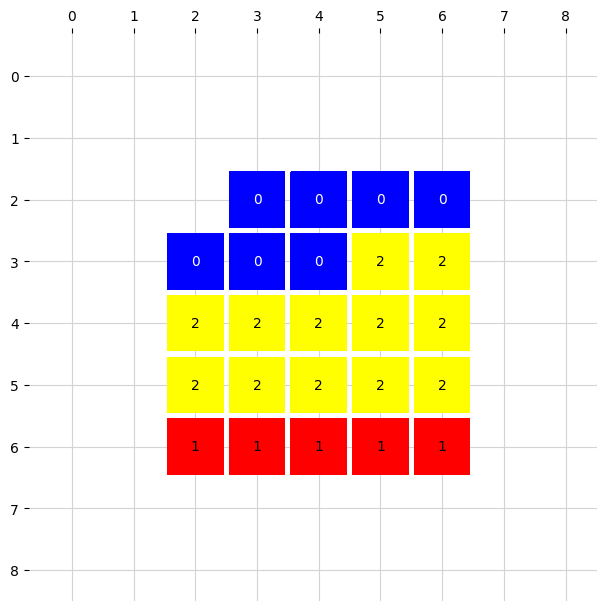

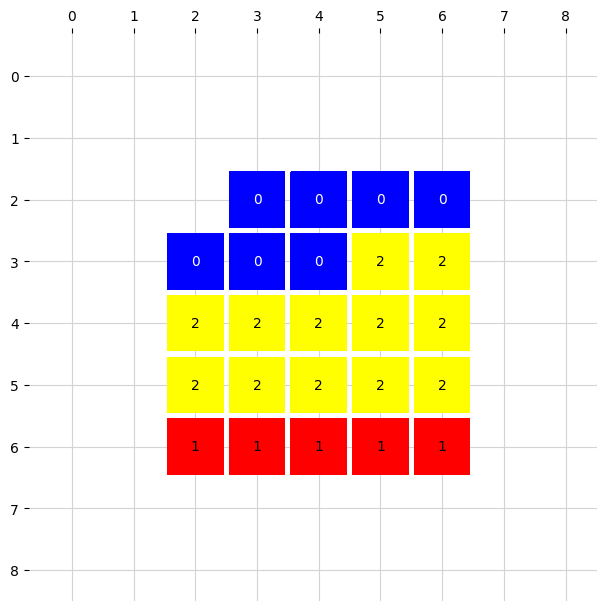

In [68]:
sys = rg.rgrow.System.new_sdc(params)
state = rg.State((9,9), 'square', 'none')
sys.update_all(state)
for i in range(20):
    sys.evolve(state, for_events = 10)
    state
    sys.plot_canvas(state, annotate_tiles = True)